<div style="margin-right: 70px;">

<div style="margin-right: 70px;">

<div style="margin-right: 70px;">

<div style="margin-right: 70px;">

<!-- ![SegmentLocal](short_demo.gif "segment") -->
</div>
</div>
</div>
</div>

<div style="margin-right: 70px;">

<p style="font-size: 25pt; text-align: center;">Developing an Interactive Dashboard for Evaluating Research Performance in UK Higher Education Institutions</p>

<div style="text-align: right;">A project by <a href="https://www.linkedin.com/in/danko-a-925606259/">Danko Alorvor</a></div>

<div style="text-align: right; font-size: 8pt;">(For a brief overview, please check out the <a href="https://github.com/Dank-o/UK-University-Research-Performance-PowerBI/blob/main/README.md">README page</a>.)</div>

# Contents

Introduction

Project goals

Problems with existing ranking systems

How this system is an improvement

Some insights

Features of the dashboard

Limitations

Notes about the dataset

Glossary

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Discipline

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Discipline group

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Comprehensiveness

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Score

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Rank

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Percentile

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Quality levels

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Quality profiles

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FTE staff

References

# Introduction

Suppose you are an administrator at a higher education institution (HEI) in the UK looking to evaluate research performance across different departments. A system that allows for the comparison and ranking of departmental performance within each discipline, as well as against other institutions, would be highly valuable. Similarly, researchers and graduate students seeking to advance their academic careers would benefit from a data-driven system to identify institutions excelling in their chosen field, rather than relying on subjective assessments or the general prestige of the institution. Furthermore, members of the public often have an interest in understanding which HEIs produce research of the highest quality. To address the needs of these groups, I developed an interactive Power BI dashboard to provide insights into the research performance of UK HEIs using data from the [2021 Research Excellence Framework](https://2021.ref.ac.uk/) (REF 2021).

REF 2021 was a comprehensive undertaking to assess the quality of research in higher education institutions conducted jointly by the four UK higher education funding bodies and is [used to](https://www.ukri.org/publications/research-england-how-we-fund-higher-education-providers/how-we-fund-higher-education-providers/) [allocate](https://www.sfc.ac.uk/our-funding/university-funding/) around £2 billion per year to universities for research. Each HEI was required to submit documentation and evidence representative of their research activity over the period 1 January 2014 to 31 December 2020. These submissions were grouped into 34 units of assessment (UoAs) that roughly correspond to research disciplines and were graded with a qualitative five-point system.

Each submission made by an institution into a UoA contained a standard set of information related to three elements or "sub-profiles": the quality of research **outputs**, the quality of the research **impact** and the quality of the **environment** to support research and impact. Each submission was then assessed in terms of these three elements that were combined to produce an **overall** quality “profile” awarded to each submission.

This resulted in a [dataset of ratings](https://2021.ref.ac.uk/guidance-on-results/guidance-on-ref-2021-results/index.html) assigned to submissions of 157 HEIs across the UoAs broken down by the (sub-)profiles—indicating the percentage of the submissions of a discipline (UoA) at an HEI that achieved a specific quality level at each profile. For example, the University of Glasgow had its outputs for Mathematics rated as 50.4% world-leading, 48.8% internationally excellent, 0.8% “recognised internationally” 0.0% “recognised nationally” and 0.0% “below nationally recognised standard or not suitable for assessment”. (See “The dataset and dashboard terminology” section below for more details.)

To compare and rank performance between or within institutions, a score derived from a weighted combination of the ratings across the five-point system is needed. However, the published data do not immediately permit such comparisons as ratings are given as percentages obtained in the qualitative five-point system, as the above example shows. However, the weighting schemes used by funding bodies (not included in the REF data) and education consultancies are inadequate for meeting the needs of the researchers, graduate students and administrators listed previously.

Power BI provides an effective platform for creating and displaying this ranking system. I have made particular use of its filtering and interactive capabilities to allow users to create their own rankings. (See the “Features of the Dashboard” section for more details.) I also adapted and created DAX functions that do not exist such as a percentile rank function. Additional analysis, experimentation, data cleaning and visualisation of distributions were done in Python.

The dashboard has also benefitted from feedback from researchers who have used it and suggested improvements.

# Project goals

In order to facilitate comparisons between and within institutions, I set out to

1. produce a suitable weighting scheme that combines these ratings into scores,
2. visualise the data most relevant to the user groups and
3. present the data in a way that encourages meaningful comparisons between institutions.

The idea is to be able to identify top universities for research in a selected discipline(s) as well as select an institution and find out what its particular strengths and weaknesses are when compared against suitably similar institutions. The approach to comparing by similarity is implemented by filtering by staff numbers and comprehensiveness in the range of disciplines researched. This solves several problems faced by other ranking systems that rely on such data, as explained below.

# Problems with existing ranking systems

The most prominent providers of rankings that assess the research quality of HEIs globally<sup><sup>[\[1\]](#footnote-1)</sup></sup> are Times Higher Education (THE), Quacquarelli Symonds (QS), and Academic Ranking of World Universities (ARWU). These ranking systems are frequently [criticised](https://theconversation.com/university-rankings-are-unscientific-and-bad-for-education-experts-point-out-the-flaws-223033) as [inadequate](https://link.springer.com/article/10.1007/s10734-022-00990-x) for making [meaningful comparisons](https://blogs.lse.ac.uk/impactofsocialsciences/2023/09/11/what-would-honest-university-rankings-look-like/), as they have [poorly chosen indicators](https://blogs.lse.ac.uk/impactofsocialsciences/2021/03/22/the-absurdity-of-university-rankings/) that tend to [focus heavily on reputation](https://www.insidehighered.com/news/2013/05/29/methodology-qs-rankings-comes-under-scrutiny), metrics that undervalue institutions with [substantial social science and humanities](https://www.insidehighered.com/views/2010/11/11/state-rankings) output and [disfavour small](https://link.springer.com/article/10.1007/s11192-014-1488-z) or [young institutions](https://yerun.eu/2024/12/yerun-endorsement-of-the-more-than-our-rank-initiative/)—reinforcing inequalities in society. These rankings are based almost exclusively on proxies for quality, such as the number of publications in the journals _Nature_ and _Science_, the number of Nobel prize winners (from generations ago), and reputation votes. The [unsuitability of these proxies](https://blogs.lse.ac.uk/impactofsocialsciences/2021/03/22/the-absurdity-of-university-rankings/) is starkly demonstrated by Bielefeld University’s<sup>[\[2\]](#footnote-2)</sup> jump from position 250 to 166 in the THE rankings between the years 2018 to 2020 due to 10 publications representing a single author's participation in a large international collaboration—the Global Burden of Disease study. Additionally, these rankings are heavily influenced by institution size and usually include teaching and other student-centric factors, and hence, are not well suited to evaluating research quality.

Aside from the methods of the traditional rankings, weighting schemes have been applied to the REF 2021 data to evaluate UK institutions. In particular, the governmental organisations that commissioned the REF have a system<sup>[\[3\]](#footnote-3)</sup> that combines the raw rating data to determine [how to allocate research funding](https://www.ukri.org/publications/research-england-how-we-fund-higher-education-providers/how-we-fund-higher-education-providers/) to HEIs. One step of this process is to create a grade point average (GPA) that assigns 4 points to the highest quality rating (“world-leading”), 1 point to the next level (“internationally excellent”) and 0 to the remaining three 0 (“recognised internationally”, “recognised nationally”, and “below nationally recognised standard or not suitable for assessment”). That is, the scheme has the respective weights: 4,1,0,0 and 0—clearly designed to focus rewards on only the very best performers. Thus, an institution with most of its research judged “internationally excellent” and “recognised internationally” will perform poorly. Similarly, an HEI with all its outputs rated as “recognised internationally” will receive a score of 0—the same as an institution with all its outputs rated at the lowest level: “below nationally recognised standard or not suitable for assessment”. Though these outcomes may be suitable for the intentions of the funding bodies, this is a harsh system that cannot discriminate between good and poor performance— a distinction especially pertinent to administrators. Note that these scores are not included in the REF data nor produced by the REF, as the funding allocation process is distinct from the research evaluation process.

The Times Higher Education consultancy (THE) has also produced a ranking table based on REF 2021 that uses a far more [lenient weighting system](https://www.timeshighereducation.com/news/ref-2021-times-higher-educations-table-methodology) (weights: 4, 3, 2, 1, 0) to calculate GPAs<sup>[\[4\]](#footnote-4)</sup>. They then multiply the GPAs by the number of staff to produce a “research power” score. Plausibly, research power is used because ranking all institutions across all subjects by their size-independent GPAs results in obscure, small and highly specialised institutions appearing high in the rankings. This is unsurprising; institutions that offer a single discipline are compared against others that offer up to 30 disciplines. For example, offering and excelling in Business and Management Studies alone makes the London Business School the top institution.

THE claims that factoring in the size of an institution is motivated by “the view that excellence is, to some extent, a function of scale as well as quality”. However, the research power ranking is overwhelmingly determined by staff numbers, as indicated by an _R_<sup>2</sup> of 99.75% (compared to around 31% for the raw GPA). Moreover, there is already a strong (non-linear) relationship between GPA and size in non-specialist institutions. This suggests that GPA substantially reflects the influence of staff numbers in these categories, making it redundant to explicitly factor size into rankings. (See the section “Some observations” for more details.) Why not let the user decide what size they are interested in?

Additionally, the distribution of the GPAs obtained by the THE’s weights is left skewed—such that there’s little to separate the high-performing institutions. On the other hand, the low-performing end has large differences from one HEI to the next. In contrast, the scheme used by the UK funding bodies results in a GPA distribution much closer to normal—suggesting that the difference in quality within groups of institutions at either end of the scale is assumed to be symmetric. See _Figures 1_ and _2_ for a comparison of the GPAs (converted to percentages) for the “overall” profile obtained from applying the THE’s and the funding bodies’ weights, respectively. See _Figure 4_ for an even clearer comparison with ungrouped discipline submissions.

<div style="text-align: center; margin-right: 70px;">
    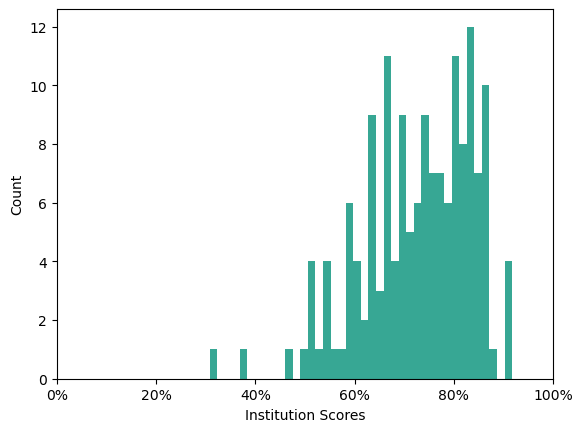
    <p style="text-align: center;"><em>Figure 1: A histogram of institution scores (overall profile) calculated by THE’s weighting scheme. (n = 157)</em></p>
</div>

<div style="text-align: center; margin-right: 70px;">
    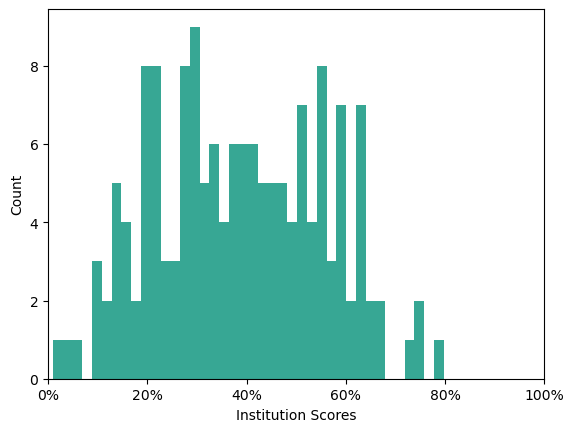
    <p style="text-align: center;"><em>Figure 2: A histogram of institution scores (overall profile) calculated by the funding bodies’ weighting scheme. (n = 157)</em></p>
</div>

# How this system is an improvement

The REF data, based directly on evaluating representative outputs combined with the holistic inclusion of research impact and environment, improves on the indirect, reputation and legacy-based approach that the popular rankings use. The evaluation and rating process was also thoroughly audited through various mechanisms, ensuring consistency in assessment standards within and between sub-panels (discipline groups). Additionally, the REF allows institutions, like the School of Oriental and African Studies (SOAS), that focus on social sciences and humanities to get a fairer evaluation. Rather than solely relying on publications that are typically STEM outlets, like scientific journals_,_ discipline-appropriate outputs, such as books and creative works, were used.

Furthermore, I chose a weighting system (4, 1.5, 1, 0.5, 0) that is balanced between being strict enough to heavily reward top performers—reflecting the intentions of the organisations that commissioned the data—and still rewarding quality at all levels of the five-point system. As shown in _Figure 3,_ this also achieves a distribution that is approximately normal and hence successfully discriminates institutions in any score range. Unlike the strict funding body and lenient THE schemes described above this system is more consistently approximately normal—even when the data are filtered by different profiles (i.e., outputs, environment and impact), discipline groups (e.g. Arts and Humanities) as well as when the data are analysed at the most granular level without institutional grouping; whereby each score is for a submission for an individual discipline researched at a particular university. The latter is shown in _Figure 4._

On the other hand, I retained the weightings used to combine quality profiles to maintain consistency with the original REF 2021 publication. This decision stems from the inherent link between the scope of the material evaluated and its significance within the overall profile. The REF project's data collection was guided by anticipated weight distributions, making it illogical to heavily emphasise data gathered with an intensity and volume suitable for indicators deemed less critical, and vice versa. Moreover, the same project that conducted the evaluations established the weights with the explicit aim of characterising quality. In contrast, the weights used to calculate GPAs by the funding bodies serve a distinct purpose—resource allocation.

Lastly, I used percentages rather than the 4-point GPA system because 60% is immediately more informative than the GPA-equivalent value of 2.4, for example.

<div style="text-align: center; margin-right: 70px;">
    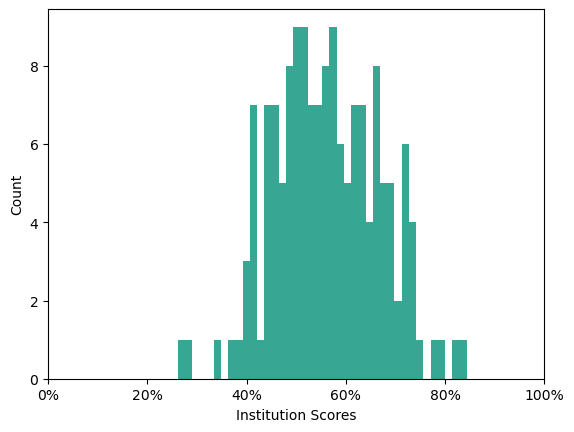
    <p style="text-align: center;"><em>Figure 3: A histogram of institution scores (overall profile) calculated by the weighting scheme used in this project. (n = 157)</em></p>
</div>

<div style="text-align: center; margin-right: 70px;">
    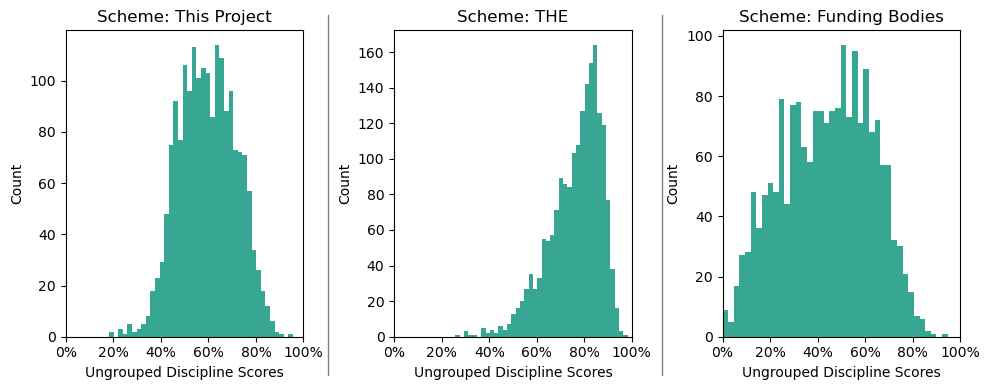
    <p style="text-align: center;"><em>Figure 4: Side-by-side histograms of ungrouped discipline scores (overall profile) comparing the weighting schemes used by this project, THE and the funding bodies. (n = 1881)</em></p>
</div>

This dashboard enhances data analysis by allowing users to filter institutions based on their comprehensiveness (range of disciplines offered) and staff count. This facilitates more meaningful comparisons between similar HEIs. For instance, comparing SOAS, with its limited discipline groups, to a comprehensive university like Anglia Ruskin University can be misleading, despite similar staff numbers. Prioritising comparisons between institutions with similar levels of specialisation or comprehensiveness ensures fairer evaluations across diverse institutions. This deals with cases like The London Business School without diluting the effectiveness of the data.  
<br/>On the other hand, when comparing HEIs by an individual discipline, it may be suitable to include institutions of any degree of specialisation/comprehensiveness but use size to include only institutions of interest. Engineering, for example, ranges from 5 to 420 FTE staff; comparing the output of departments separated by almost two orders of magnitude, hardly seems appropriate.

# Some insights<sup><sup>[\[5\]](#footnote-5)</sup></sup>

Some small- and moderately-sized institutions like Imperial College London, the University of York, and the London School of Economics and Political Science perform significantly better than the international rankings would suggest—ranking 1<sup>st</sup>, 3<sup>rd</sup> and 7<sup>th</sup> in the comprehensive categories. The ARWU, for example, ranked them 4<sup>th</sup>, 15<sup>th</sup> and 34<sup>th</sup>, respectively, within the UK in 2021.

Relying on the prestige of the University of Cambridge is likely to lead one astray as it performs below average in Classics, Area Studies, and Anthropology and Development Studies—with the latter placing in the bottom quartile. On the other hand, this information suggests the need for strong administrative intervention.

When including all disciplines, analysis using a power function fitted to comprehensive and fully comprehensive institutions demonstrates a strong association between scores and staff numbers (_R_<sup>2</sup> ≈ 79%), compared to a weaker fit when modelling all institutions (_R_<sup>2</sup> ≈ 36%)<sup>[\[6\]](#footnote-6)</sup>. This suggests that the effect of size is pronounced within comprehensive categories but weaker across the full range of institutions, as shown in _Figures 6_ and _7_.

<div style="text-align: center; margin-right: 70px;">
    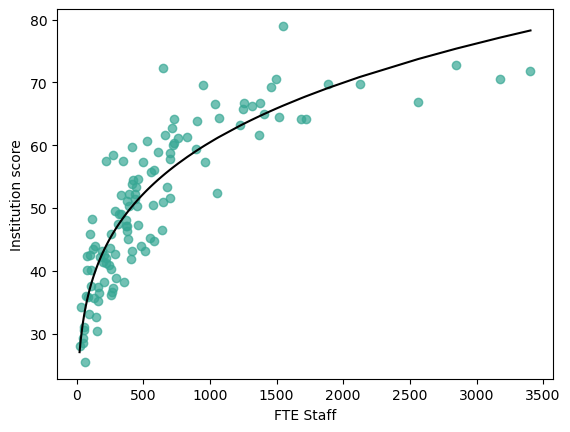
    <p style="text-align: center;"><em>Figure 6: A power function fitted to a scatterplot of staff numbers against institutional scores (n = 119) across all subjects showing a strong model fit with R-squared ≈ 79%.</em></p>
</div>

<div style="text-align: center; margin-right: 70px;">
    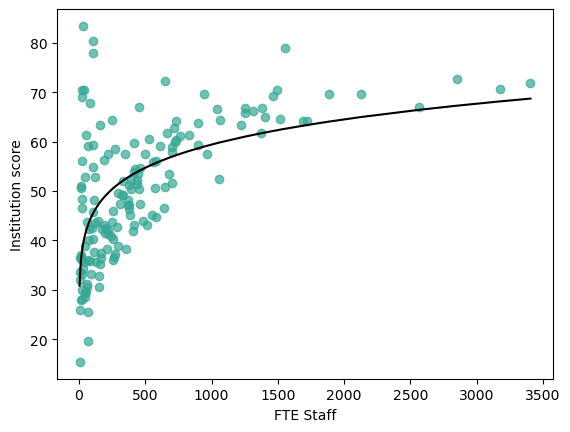
    <p style="text-align: center;"><em>Figure 7: A power function fitted to a scatterplot of staff numbers against institutional scores (n = 119) across all subjects showing a moderate model fit with R-squared ≈ 36%.</em></p>
</div>

# Features of the dashboard

<div style='text-align: center;'>
    <img src='short_demo.gif' alt='short_demo' style='width: 12cm;'>
    <p style='text-align: center;'><em>short_demo</em></p>
</div>

_Figure 5: A snapshot of the dashboard with the University of Glasgow compared with comprehensive and highly comprehensive institutions across all disciplines (overall profile)_

The right-hand side of the dashboard is prominently occupied by a table that displays for each institution, the score, number of disciplines (i.e., UoAs) offered, (FTE) staff numbers and coarse-grained rank. This can be filtered by buttons in the top section to view rankings by the desired quality profile; allowing an administrator to inspect why their overall score for a given discipline was low, for example.

Filtering by comprehensiveness and (FTE) staff numbers is also easily achieved by buttons in the top section; affording a researcher direct control over the kind of institutions that are compared. For example, one researcher may prefer to work in a highly comprehensive institution—where multi-disciplinary opportunities abound, while another researcher may prefer smaller institutions even if they are highly specialised. Similarly, an administrator may want to compare their institution’s performance in a discipline with institutions of a similar size.

At the top left-hand side, one can select an institution from a drop-down list. Below that is a bar chart with scores for all disciplines. The selected institutions’ score for each discipline is displayed as a blue bar side-by-side with a green bar representing the average score of the other (possibly filtered) institutions in the data set. One can then click on a discipline in the bar chart and cause the ranking table on the right of the dashboard to be sorted by performance in the selected discipline. Additionally, the rank percentile for each discipline of the selected institution (within the filtered group’s distribution) is displayed at the tip of the bars. I used percentiles here as this compresses the individual tables for each discipline into a number that allows an administrator, for example, to compare multiple disciplines at a glance.

One can also compare the selected institution with the group by how staff are distributed across discipline groups, how scores are distributed across the quality profiles, and how ratings are distributed across the quality levels in three separate charts in the centre of the dashboard. The staff distribution is likely to be relevant to a researcher or graduate while the other two may be more relevant to administrators.

A simple colour scheme is used throughout, with data about the selected institution in blue and data for the group of filtered institutions in green—matching the branding of the fictional organisation, Higher Insight Analytics (HIA)<sup>[\[7\]](#footnote-7)</sup>.

# Limitations

As with all rankings, [much care is needed](https://www.cwts.nl/blog?article=n-r2q274) when using and interpreting the data. Many of the limitations of the REF 2021 data transfer to this project. Thus, it is worth keeping in mind that this project is focused on evaluating research quality, other aspects of university performance such as teaching are left out. Furthermore, the short span of the evaluation window is sometimes inadequate to capture the long-term impact of research.

While popular outlets release rankings every year, REF 2021 data is four years old as of writing. However, this data is still very apt for this purpose, as universities do not change rapidly. Indeed, mainstream ratings have been criticised for their [high year-to-year variability](https://peerj.com/articles/1217/).

Lastly, the data lacks granularity, making it impossible to obtain insights into specific disciplines. An academic is more likely to be interested in identifying an institution that excels in a subdiscipline like robotics, rather than an aggregate like “Computer Science and Informatics”. This suggests the dashboard may be more useful to early career researchers and graduate students who may have broader research interests.

# Notes about the dataset

The dataset contains 157 HEIs across 34 discipline-based units of assessments characterising research activity in all disciplines over the period from 1st January 2014 to 31st December 2020. This is [publicly available](https://results2021.ref.ac.uk/) as an XLSX file containing 7506 rows and 14 columns detailing the ratings obtained for each discipline across quality levels and quality profiles, together with data on FTE staff numbers, submissions rates and other entries not used in the project.

The names of the most popular HEIs were replaced with shorter (and often more commonly used) alternatives for better visibility within the dashboard elements. For example, “University College London” is replaced with “UCL”.

Some institutions have the standard disciplines split up into separate submissions in the original dataset. These were combined in the project. (See the REF website for [more information](https://2021.ref.ac.uk/publications-and-reports/invitation-to-make-requests-for-multiple-submissions-exception-from-submission-for-small-units-and-for-impact-case-studies-requiring-security-clearance/index.html).)

Buckinghamshire New University, the University of Chichester, the University of Lincoln and the University of Winchester are missing sub-profile data for a number of subjects.

# Glossary

Except for “comprehensiveness”, “rank”, “score”, “percentile”, “discipline” and “discipline groups”, all terms and definitions are derived from the REF 2021 framework.

## Discipline

These include disciplines in the conventional sense, such as “Chemistry”, “Philosophy”, etc. as well as small, closely related groupings such as “Psychology, Psychiatry and Neuroscience” and “Agriculture, Food and Veterinary Sciences”. While the data refers to these as “units of assessment” in the data, I use the label “disciplines” to facilitate comprehension of the dashboard and minimise the need for looking up definitions.

## Discipline group

Disciplines are assigned to exactly one of the following:

- Medicine, health and life sciences
- Engineering, physical & mathematical sciences
- Social sciences
- Arts and humanities

(These are respectively referred to as the “main panels” A, B, C and D in REF publications.)

## Comprehensiveness

This category is also not present in the original data. It is defined by the number of discipline groups an HEI has reported. Filtering by comprehensiveness allows one to compare institutions that are more similar to each other. The labels fully comprehensive, comprehensive, specialised and highly specialised respectively refer to HEIs with disciplines represented in exactly four, three, two and one discipline group(s).

## Score

A percentage numeral that characterises an institution’s performance in a subject. Calculated as follows:

<div style="text-align: center;">Score = ([4★] × 4 + [3★] × 1.5 + [2★] × 1 + [1★] × 0.5 + [Unclassified] × 0) / 4</div>

The square brackets here enclose the percentage of submissions rated at the specified level.

This value is aggregated by averaging to obtain scores over groups of subjects or groups of institutions.

## Rank

I added a rank category to the data to facilitate comparison—results of HEI evaluations are most often reported in terms of their rankings. However, ranking providers have been criticised for using [excessively precise rankings](https://blogs.lse.ac.uk/impactofsocialsciences/2023/09/11/what-would-honest-university-rankings-look-like/), as though minute differences in their scoring system are meaningful. I agree with this criticism, especially since a lot of subjectivity is involved in the process at all stages of data acquisition and analysis. Therefore, I coarse-grained the rankings by rounding off to the nearest whole percent to cluster the scores. For the overall profile of all 157 institutions with all subjects included, this produces a mean cluster size of about 3. (Sorting by “score” instead of “rank” will allow one to quickly infer a more fine-grained ranking if desired.)

## Percentile

This statistic is given only at the discipline level. It refers to the percentage of filtered institutions with a rank lower than or equal to the selected institution in a given discipline.

## Quality levels

### Overall profile

The overall profile can be summarised as evaluating originality, significance and rigour with starred levels corresponding to the following; 4★: world-leading, 3★: internationally excellent, 2★: recognised internationally, 1★: recognised nationally, Unclassified: below nationally recognised standard or not suitable for assessment.

### Output sub-profile

The defined levels are identical to the overall profile above, but displayed here in full:

| Quality level | Description |
| --- | --- |
| 4★  | Quality that is **world-leading** in terms of originality, significance and rigour. |
| 3★  | Quality that is **internationally excellent** in terms of originality, significance and rigour but which **falls short of the highest standards** of excellence. |
| 2★  | Quality that is **recognised internationally** in terms of originality, significance and rigour |
| 1★  | Quality that is **recognised nationally** in terms of originality, significance and rigour. |
| Unclassified | Quality that **falls below the standard of nationally recognised** work. Or work which **does not meet the published definition of research** for the purposes of this assessment. |

### Impact sub-profile

The starred levels denote quality as follows:

| Quality level | Description |
| --- | --- |
| 4★  | **Outstanding** impacts in terms of their reach and significance. |
| 3★  | **Very considerable** impacts in terms of their reach and significance. |
| 2★  | **Considerable** impacts in terms of their reach and significance. |
| 1★  | **Recognised but modest** impacts in terms of their reach and significance. |
| Unclassified | The impact is of **little or no reach and significance**; or the impact was **not eligible**; or the impact was **not underpinned by excellent research** produced by the submitted unit |

### Environment sub-profile

The starred levels denote quality as follows:

| Quality level | Description |
| --- | --- |
| 4★  | An environment that is **conducive to producing research of world-leading** **quality** and **enabling outstanding impact**, in terms of its vitality and sustainability. |
| 3★  | An environment that is **conducive to producing research of internationally excellent** **quality** and **enabling very considerable impact**, in terms of its vitality and sustainability. |
| 2★  | An environment that is **conducive to producing research of internationally recognised quality** and **enabling considerable impact**, in terms of its vitality and sustainability. |
| 1★  | An environment that is **conducive to producing research of nationally recognised quality** and **enabling recognised but modest impact**, in terms of its vitality and sustainability. |
| Unclassified | An environment that is **not conducive to producing research of nationally recognised quality** or **enabling impact of reach and significance**. |

## Quality profiles

### Outputs

Outputs are the published or publicly available products of research, which can take many forms. These include books, monographs, chapters in books and journal articles as well as performances, exhibitions and other practice research outputs, software, patents, conference proceedings, translations, and digital and visual media. Outputs were assessed against three criteria: originality, significance, and rigour.

### Impact

HEIs were required to submit impact case studies that demonstrate the impacts their research has had beyond academia. Impact is defined as the effect on, change or benefit to the economy, society, culture, public policy or services, health, the environment or quality of life, beyond academia. This was assessed against two criteria: reach and significance.

### Environment

HEIs were required to submit narrative evidence of the environment to support research and enable impact within each unit, alongside data on research income, research income in kind, and completed doctoral degrees. Environment refers to “the environment for supporting research and enabling impact within each submitting unit”. Assessed against two criteria: vitality and sustainability.

### Overall

This is the aggregate rating obtained by weighting the profiles as follows; outputs: 60%, impact: 25%, and environment: 15%.

These weights are applied together with the quality level weightings only when aggregated to get the overall score. Therefore, when filtering the dashboard by the sub-quality profiles (eg., by impact only), just the quality level weightings are applied.

## FTE staff

Full-time equivalent (FTE) is a measurement that combines the hours worked by employees to determine the number of full-time employees it would take to work those hours. For example, if an HEI considers 37.5 hours full time, an employee working 7.5 hours per week would be 0.2 FTE staff and five such employees would constitute 1 FTE staff.

For REF 2021 all staff with a contract of employment with at least 0.2FTE that had significant responsibility for research during the evaluation period.

Any references to “size” or just “staff” in any part of this project refer to FTE staff.

# References

<https://www.ukri.org/publications/research-england-how-we-fund-higher-education-providers/how-we-fund-higher-education-providers>

<https://www.sfc.ac.uk/our-funding/university-funding>

<https://2021.ref.ac.uk/guidance-on-results/guidance-on-ref-2021-results/index.html>

<https://www.timeshighereducation.com/news/ref-2021-times-higher-educations-table-methodology>

<https://www.thecompleteuniversityguide.co.uk/sector/insights/university-and-subject-league-tables-methodology>

<https://link.springer.com/article/10.1007/s10734-022-00990-x>

<https://www.researchprofessionalnews.com/rr-news-uk-universities-2022-5-ref2021-the-top-10/>

<https://www.hepi.ac.uk/wp-content/uploads/2016/12/Hepi_International-university-rankings-For-good-or-for-ill-REPORT-89-10_12_16_Screen.pdf>

<https://peerj.com/articles/1217>

<https://2021.ref.ac.uk/faqs/index.html>

<https://2021.ref.ac.uk/publications-and-reports/invitation-to-make-requests-for-multiple-submissions-exception-from-submission-for-small-units-and-for-impact-case-studies-requiring-security-clearance/index.html>

<https://theconversation.com/university-rankings-are-unscientific-and-bad-for-education-experts-point-out-the-flaws-223033>

<https://blogs.lse.ac.uk/impactofsocialsciences/2021/03/22/the-absurdity-of-university-rankings>

<https://link.springer.com/article/10.1007/s11192-014-1488-z>

<https://www.insidehighered.com/news/2013/05/29/methodology-qs-rankings-comes-under-scrutiny>

<https://blogs.lse.ac.uk/impactofsocialsciences/2023/09/11/what-would-honest-university-rankings-look-like>

<https://www.insidehighered.com/views/2010/11/11/state-rankings>

<https://yerun.eu/2024/12/yerun-endorsement-of-the-more-than-our-rank-initiative/>

<https://www.cwts.nl/blog?article=n-r2q274>

# Footnotes

1. Rankings exclusively focused on UK HEIs such as _The Complete University Guide_ and _The Guardian_ tend to [focus on student experience and outcomes](https://www.thecompleteuniversityguide.co.uk/sector/insights/university-and-subject-league-tables-methodology). [↑](#footnote-ref-1)

2. A German HEI. [↑](#footnote-ref-2)

3. This includes many details not relevant to quality evaluation, such as laboratory expenses and location. [↑](#footnote-ref-3)

4. Research Professional News also has a very [similar ranking system](https://www.researchprofessionalnews.com/rr-news-uk-universities-2022-5-ref2021-the-top-10/) with identical flaws. [↑](#footnote-ref-4)

5. In this section, unless specified otherwise unfiltered or aggregated categories should be assumed, i.e., all subjects, overall profile, and all levels of comprehensiveness. [↑](#footnote-ref-5)

6. The model fit is consistent regardless of the weighting system. [↑](#footnote-ref-6)

7. This is an organisation I invented for the project to include an element of branding typical of visual data products. [↑](#footnote-ref-7)
</div>